In [1]:
!pip install mplfinance

In [1]:
import pandas as pd
import numpy as np
import yfinance
from mplfinance.original_flavor import candlestick_ohlc
import matplotlib.dates as mpl_dates
import matplotlib.pyplot as plt

In [2]:
plt.rcParams['figure.figsize'] = [12, 7]
plt.rc('font', size=14)

In [3]:
ticker = yfinance.Ticker('ASIANPAINT.ns')

In [4]:
df = ticker.history(interval="1d", start="2020-03-15", end="2020-07-15")
df['Date'] = pd.to_datetime(df.index)
df['Date'] = df['Date'].apply(mpl_dates.date2num)


In [5]:
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Date
Date,,,,,,,,
2020-03-16,1751.813616,1751.813616,1654.364694,1659.540283,2867336,0,0,18337.0
2020-03-17,1674.919090,1754.573913,1646.330123,1707.057007,2643189,0,0,18338.0
2020-03-18,1707.451378,1733.625118,1585.208901,1595.264282,3676437,0,0,18339.0
2020-03-19,1518.172719,1630.507594,1410.914754,1578.505249,4906644,0,0,18340.0
2020-03-20,1587.180521,1732.491358,1548.289717,1718.246094,3128629,0,0,18341.0


In [6]:
df = df.loc[:,['Date','Open','High','Low','Close']]

In [7]:
df.head()

,Date,Open,High,Low,Close
Date,,,,,
2020-03-16,18337.0,1751.813616,1751.813616,1654.364694,1659.540283
2020-03-17,18338.0,1674.919090,1754.573913,1646.330123,1707.057007
2020-03-18,18339.0,1707.451378,1733.625118,1585.208901,1595.264282
2020-03-19,18340.0,1518.172719,1630.507594,1410.914754,1578.505249
2020-03-20,18341.0,1587.180521,1732.491358,1548.289717,1718.246094


In [8]:
def isSupport(df,i):
    support = df['Low'][i] < df['Low'][i-1] and df['Low'][i]<df['Low'][i+1] and df['Low'][i+1] < df['Low'][i+2] and df['Low'][i-1] < df['Low'][i-2]
    return support

In [9]:
def isResistance(df,i):
  resistance = df['High'][i] > df['High'][i-1]  and df['High'][i] > df['High'][i+1] and df['High'][i+1] > df['High'][i+2] and df['High'][i-1] > df['High'][i-2]
  return resistance

In [10]:
#Finally, let’s create a list that will contain the levels we find. Each level is a tuple whose 
#first element is the index of the signal candle and the second element is the price value.

In [11]:
levels = []
for i in range(2,df.shape[0]-2):
  if isSupport(df,i):
    levels.append((i,df['Low'][i]))
  elif isResistance(df,i):
    levels.append((i,df['High'][i]))

In [14]:
def plot_all():
  fig, ax = plt.subplots()
  candlestick_ohlc(ax,df.values,width=0.6, \
                   colorup='green', colordown='red', alpha=0.8)
  date_format = mpl_dates.DateFormatter('%d %b %Y')
  ax.xaxis.set_major_formatter(date_format)
  fig.autofmt_xdate()
  fig.tight_layout()
  for level in levels:
    plt.hlines(level[1],xmin=df['Date'][level[0]],\
               xmax=max(df['Date']),colors='blue')
  fig.show()

C:\Users\dhing\AppData\Local\Temp/ipykernel_14016/2905867858.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


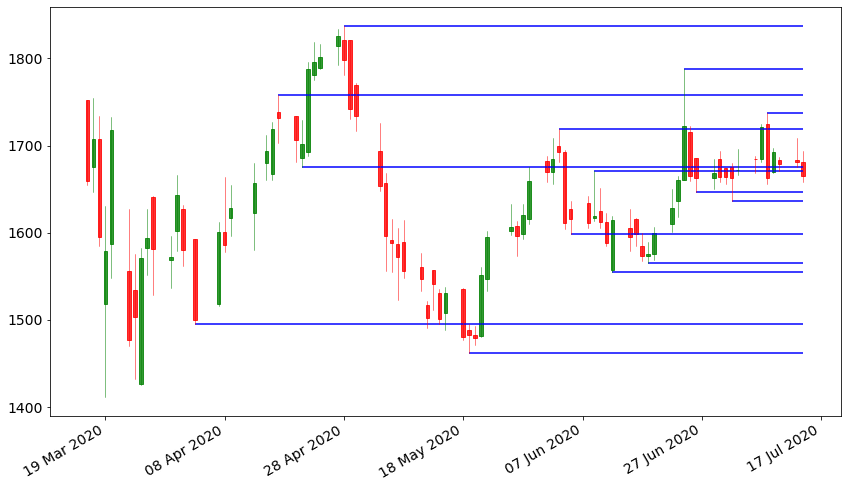

In [15]:
plot_all()

In [70]:
signals = []
for i in range(len(df)):
    if df.iloc[i,4]>df.iloc[i,1]:
        signals.append(1)
    else:
        signals.append(0)
df['Signal'] = signals

In [58]:
df.head()

,Date,Open,High,Low,Close,Signal
Date,,,,,,
2020-03-19,18340.0,1518.172719,1630.507594,1410.914754,1578.505249,1
2020-03-24,18345.0,1534.488197,1575.350655,1432.652278,1503.237427,0
2020-04-03,18355.0,1592.208182,1593.095450,1495.745093,1499.343384,0
2020-04-08,18360.0,1600.785004,1663.877896,1577.322287,1586.145386,0
2020-04-13,18365.0,1622.670100,1679.503011,1580.131671,1657.026123,1


In [88]:
support = df.iloc[0,2] 
resistance = df.iloc[0,3]
dateb=[]
s=[]
dates=[]
r=[]
dater=[]
counts = 0
countr = 0
for i in range(len(df)):
    #support becoming resistance
    #breakpoints
    if(df.iloc[i,2] <= support):
        r.append(support)
        resistance = support
        countr +=1
        dateb.append(df.iloc[i])
    #support becoming resistance
    elif ( df.iloc[i,3] <= support):
        r.append(support)
        resistance = support
        countr +=1
        dateb.append(df.iloc[i])
    #resistance becoming support
    if (df.iloc[i,2] >= resistance):
        s.append(resistance)
        support = resistance
        counts +=1
        dateb.append(df.iloc[i])
    elif (df.iloc[i,3] >= resistance):
        s.append(resistance)
        support = resistance
        counts +=1
        dateb.append(df.iloc[i])
        

In [92]:
len(dateb)

88

In [100]:
def findSupport(i,resistance):
    ind = i
    minm = resistance
    price = resistance
    while(price <= resistance):
        price = df.iloc[ind,3]
        if (price <= minm):
            minm = price
            print(minm)
        ind +=1
    return minm

In [98]:
def findResistance(i, support):
    ind = i
    maxm = support
    price = support
    while(price >= support):
        price = df.iloc[ind,2]
        if(price >= maxm):
            maxm = price
        ind += 1
    return maxm

In [101]:
support = df.iloc[0,2] 
resistance = df.iloc[0,3]
dateb=[]
s=[]
dates=[]
r=[]
dater=[]
counts = 0
countr = 0
for i in range(len(df)):
    #support becoming resistance
    #breakpoints
    if(df.iloc[i,2] <= support):
        r.append(support)
        resistance = support
        countr +=1
        dateb.append(df.iloc[i])
        support = findSupport(i, resistance)
    #support becoming resistance
    elif ( df.iloc[i,3] <= support):
        r.append(support)
        resistance = support
        countr +=1
        dateb.append(df.iloc[i])
        support = findSupport(i, resistance)
    #resistance becoming support
    if (df.iloc[i,2] >= resistance):
        s.append(resistance)
        support = resistance
        counts +=1
        dateb.append(df.iloc[i])
        resistance = findResistance(i,support)
    elif (df.iloc[i,3] >= resistance):
        s.append(resistance)
        support = resistance
        counts +=1
        dateb.append(df.iloc[i])
        resistance = findResistance(i,support)

1654.3645726098293
1646.33012335968
1585.209022069064
1410.914863181517
1646.33012335968
1585.209022069064
1410.914863181517
1585.209022069064
1410.914863181517
1410.914863181517


IndexError: single positional indexer is out-of-bounds